## Income Prediction - US Census 

### 1. Business understanding

#### Introduction:
The given dataset is from the United States Census Bureau - a principal agency of the U.S. Federal Statistical System, responsible for producing data about the American people and economy.

#### Goal:
Predict whether an individual income is <=50K/yr or >50K/yr based on census data.

#### Features:

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never Worked.

fnlwgt: continuous

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### Target Variable

Income: >50K, <=50K

#### Importing relevant Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing the Data

We are given two files

1) 'data.csv' to train our model

2) 'final.csv' to test our model


In [225]:
train_dataset = pd.read_csv('data.csv', skipinitialspace=True)
test_dataset = pd.read_csv('final.csv', skipinitialspace=True)

In [226]:
train_dataset.head()

,Unnamed: 0,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income
0,0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K
1,1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K
2,2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K
3,3,53.0,Private,NaN,NaN,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K
4,4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K


### 2. Data understanding

#### Performing Expolatory Data Analysis

In [227]:
#Dropping the Unnamed column which represents index values
train_dataset.drop(labels = 'Unnamed: 0' ,axis = 1,inplace = True)
test_dataset.drop(labels = 'Unnamed: 0' ,axis = 1,inplace = True)

In [579]:
train_dataset.dtypes

Age              float64
WorkClass         object
fnlwgt           float64
Education         object
EducationNum     float64
MaritalStatus     object
Occupation        object
Relationship      object
Gender            object
CapitalGain      float64
CapitalLoss      float64
HoursPerWeek     float64
NativeCountry     object
Income            object
dtype: object

In [228]:
train_dataset.describe()

,Age,fnlwgt,EducationNum,CapitalGain,CapitalLoss,HoursPerWeek
count,38194.000000,3.814900e+04,38132.000000,38129.000000,38217.000000,38255.000000
mean,38.591585,1.898043e+05,10.080169,1076.079467,88.536934,40.407136
std,13.682749,1.059296e+05,2.570247,7440.867512,406.104097,12.432823
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.174440e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.782510e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.378680e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Checking null values
All the columns have missing values except Unnamed and Income

In [229]:
(train_dataset.isnull().sum() / len(train_dataset))*100

Age              6.695981
WorkClass        6.813241
fnlwgt           6.805912
Education        6.700867
EducationNum     6.847441
MaritalStatus    7.143032
Occupation       6.739954
Relationship     6.876756
Gender           6.661781
CapitalGain      6.854770
CapitalLoss      6.639795
HoursPerWeek     6.546965
NativeCountry    6.666667
Income           0.000000
dtype: float64

In [230]:
train_dataset.shape

(40935, 14)

#### Target Variable 

In [582]:
train_dataset.Income.value_counts()

<=50K     21121
<=50K.    10002
>50K       6719
>50K.      3093
Name: Income, dtype: int64

In [583]:
train_dataset['Income'].replace(to_replace = '<=50K.' ,value = '<=50K',inplace = True)
train_dataset['Income'].replace(to_replace = '>50K.',value = '>50K',inplace = True)

In [584]:
#Target Variable
train_dataset.Income.value_counts()

<=50K    31123
>50K      9812
Name: Income, dtype: int64

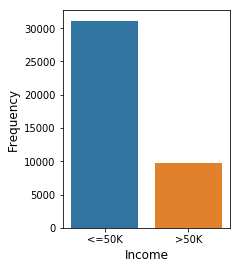

In [585]:
plt.figure(figsize =(3,4));
sns.countplot(x = 'Income', data = train_dataset);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

The dataset seems highly imbalanced, we might need to perform oversampling

#### Dividing the columns into numerical and categorical variables

In [586]:
categorical_col = train_dataset.dtypes[train_dataset.dtypes == 'object']
numerical_col = train_dataset.dtypes[train_dataset.dtypes != 'object']

In [587]:
for col in list(categorical_col.index):
    print(f"-------{col.title()}--------")
    total= train_dataset[col].value_counts()
    print(total)

-------Workclass--------
Private             26529
Self-emp-not-inc     2962
Local-gov            2443
?                    2222
State-gov            1544
Self-emp-inc         1314
Federal-gov          1107
Without-pay            16
Never-worked            9
Name: WorkClass, dtype: int64
-------Education--------
HS-grad         12356
Some-college     8501
Bachelors        6243
Masters          2102
Assoc-voc        1622
11th             1444
Assoc-acdm       1260
10th             1079
7th-8th           735
Prof-school       646
9th               598
12th              501
Doctorate         464
5th-6th           382
1st-4th           195
Preschool          64
Name: Education, dtype: int64
-------Maritalstatus--------
Married-civ-spouse       17342
Never-married            12664
Divorced                  5101
Widowed                   1207
Separated                 1195
Married-spouse-absent      473
Married-AF-spouse           29
Name: MaritalStatus, dtype: int64
-------Occupation-------

##### Workclass, Occupation & NativeCountry
* Workclass, Occupation & NativeCountry contains special character '?', we will replace it with NaN.

##### Education
* For Education we can merge 'HS-grad','11th','10th','9th','12th' into one set of category as 'High school graduates' and '1st-4th','5th-6th','7th-8th' into another set of category as 'elementary'.

##### Maritialstatus
* For Maritialstatus we can merge 'Married-spouse-absent','Married-civ-spouse','Married-AF-spouse' into one set of category as 'Married' and 'Separated','Divorced' into another set of category as 'seprated'.

##### NativeCountry
* The NativeCountry has 41 different countries in it. If we build a logistic regression with “native_country” and apply One hot Encoding we will end up with 40 additional columns. This will complicate the analysis and might lead to overfitting. Hence, it is better to group the native countries into several global regions.

#### Defining function for code reusibility

In [638]:
# Function for replacing '?' with NaN
def rep(df,new_col):
    for col in new_col:
        df.loc[df[col] == '?', col] = 'NaN'

# Function for categorizing into elementary and High school graduates
def hs(df,new_col):
    for col in new_col:
        df['Education'].replace(to_replace = hight_school_grad,value = 'High-school-grad',inplace = True)
        
def ele(df,new_col):
    for col in new_col:
        df['Education'].replace(to_replace = elementary,value = 'elementary-school',inplace = True)

# Function for categorining into Married & Seprated
def mar(df,new_col):
    for col in new_col:
        df['MaritalStatus'].replace(to_replace = married ,value = 'Married',inplace = True)
        
def sep(df,new_col):
    for col in new_col:      
        df['MaritalStatus'].replace(to_replace = separated,value = 'Separated',inplace = True)

# Function for categorizing country into US and Non US
def country(df):
    if df['NativeCountry'] in Asia_East:
            return 'East_Asia'
    elif df['NativeCountry'] in Asia_Central:
            return 'Central_Asia'
    elif df['NativeCountry'] in Central_America:
            return 'Central_America'
    elif df['NativeCountry'] in South_America:
            return 'South_America'
    elif df['NativeCountry'] in Europe_West:
            return 'Europe_West'
    elif df['NativeCountry'] in Europe_East:
            return 'Europe_East'
    elif df['NativeCountry'] == 'United-States':
            return 'United_States'

#### a. Dealing with categorical data

###### Workclass, Occupation & NativeCountry 
Replacing '?' with NaN for Workclass, Occupation & NativeCountry columns

In [625]:
new_cat_col = ['WorkClass', 'Occupation', 'NativeCountry']
rep(train_dataset, new_cat_col)
rep(test_dataset, new_cat_col)

###### Education
Merging 'HS-grad','11th','10th','9th','12th' categories into High school graduates and '1st-4th','5th-6th','7th-8th' into elementary for Education column

In [626]:
hight_school_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

hs(train_dataset,hight_school_grad)
ele(train_dataset,elementary)
hs(test_dataset,hight_school_grad)
ele(test_dataset,elementary)

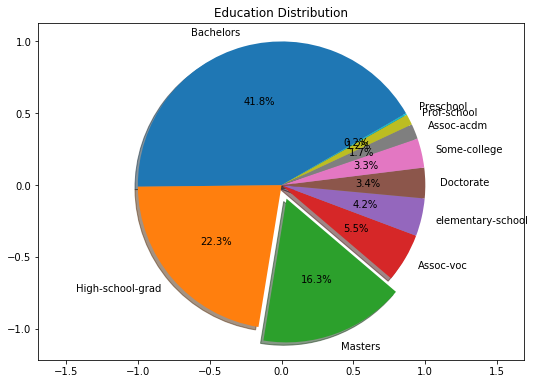

In [627]:
labels = train_dataset.Education.unique()
l = labels.tolist()
cleanedList = [x for x in l if str(x) != 'nan']
sizes = train_dataset.Education.value_counts()

explode = (0, 0, 0.1, 0,0,0,0,0,0,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=cleanedList, autopct='%1.1f%%',
        shadow=True, startangle=30, frame=True)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
ax1.axis('equal') 
plt.title("Education Distribution")
fig = plt.gcf()
fig.set_size_inches(15,6)
plt.show()

##### Below table shows the Education code for each type of Education

In [641]:
dup_rec = train_dataset[['Education','EducationNum']]

clean_rec=dup_rec.drop_duplicates(keep='first')
clean_rec = clean_rec.dropna(how='any',axis=0)

clean_rec.set_index('Education', inplace=True)
clean_rec.sort_values('EducationNum') 

,EducationNum
Education,
Preschool,1.0
elementary-school,2.0
elementary-school,3.0
elementary-school,4.0
High-school-grad,5.0
High-school-grad,6.0
High-school-grad,7.0
High-school-grad,8.0
High-school-grad,9.0


###### Marital Status
Merging 'Married-spouse-absent','Married-civ-spouse','Married-AF-spouse' categories into 'Married' and 'Separated','Divorced' categories into 'seprated'

In [635]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

mar(train_dataset,married)
sep(train_dataset,separated)
mar(test_dataset,married)
sep(test_dataset,separated)

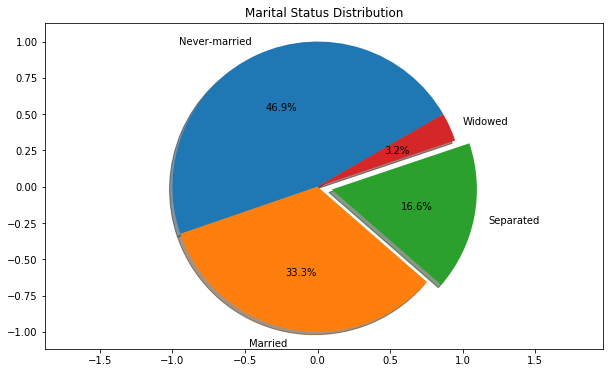

In [599]:
labels = train_dataset.MaritalStatus.unique()
l = labels.tolist()
cleanedList = [x for x in l if str(x) != 'nan']
sizes = train_dataset.MaritalStatus.value_counts()

explode = (0, 0, 0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=cleanedList, autopct='%1.1f%%',
        shadow=True, startangle=30,frame=True)
ax1.axis('equal') 
plt.title("Marital Status Distribution")
fig = plt.gcf()
fig.set_size_inches(10,6)
plt.show()

###### Native Region
Creating a new Feature named 'Native_Region'

In [628]:
Asia_East = ["Cambodia", "China", "Hong", "Laos", "Thailand", "Japan", "Taiwan", "Vietnam"]

Asia_Central = ["India", "Iran"]

Central_America = ["Cuba", "Guatemala", "Jamaica", "Nicaragua","Puerto-Rico",  "Dominican-Republic", "El-Salvador", "Haiti", "Honduras", "Mexico", "Trinadad&Tobago"]

South_America = ["Ecuador", "Peru", "Columbia"]

Europe_West = ["England", "Germany", "Holand-Netherlands", "Ireland", "France", "Greece", "Italy", "Portugal", "Scotland"]

Europe_East = ["Poland", "Yugoslavia", "Hungary"]

In [639]:
train_dataset['Native_Region'] = train_dataset.apply(country, axis=1)
test_dataset['Native_Region'] = test_dataset.apply(country, axis=1)
train_dataset.Native_Region.value_counts()

United_States      34265
Central_America     1482
Europe_West          506
East_Asia            400
Central_Asia         173
South_America        128
Europe_East          105
Name: Native_Region, dtype: int64

#### b. Dealing with numerical data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001191EE358D0>,
      dtype=object)

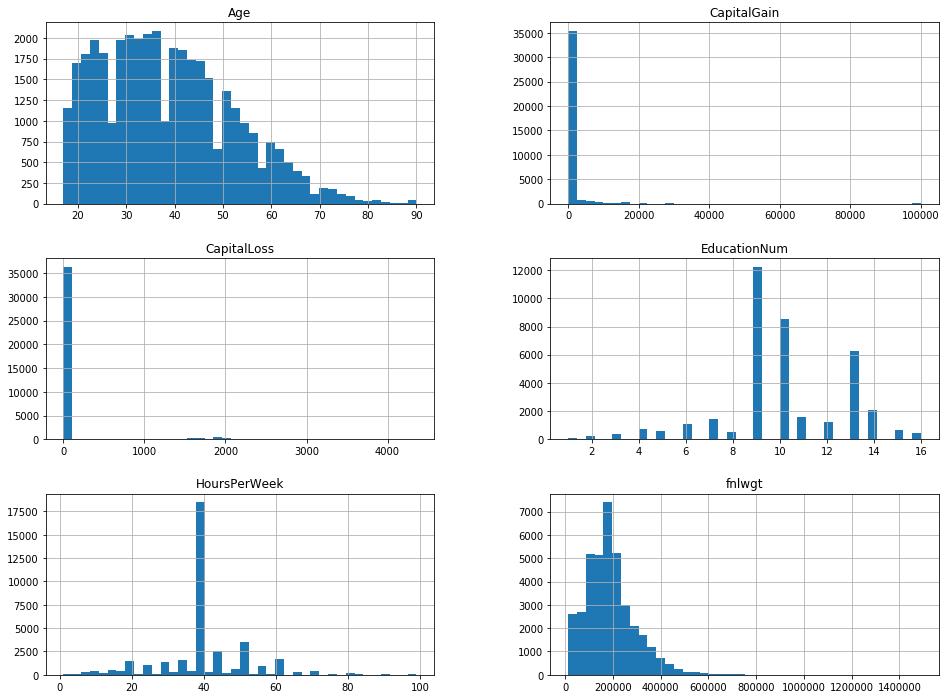

In [519]:
train_dataset[list(numerical_col.index)].hist(figsize = (16,12),bins = 40)

##### Age
Most the people fall in the age group between 18 to 50 years with the average age of around 38 years.

##### CapitalGain & CapitaLoss
CapitalGain represents profit from the sale of property or an investment. The average CapitalGain of the population from dataset is around 1700. We might be curious to know how CapitalGain varies with Occupation, Gender, Education, MaritalStatus and WorkingClass.
Same goes for CapitalLoss.

##### HoursPerWeek
Its eveident from the plot that majority of the people work between 30 to 40 hours per week.

##### Education
Most of the people in the dataset are above 8th and below 12th grade.

#### Finding the correlation between features

From the below correlation matrix we can see that (HoursPerWeek, EducationNum) and (CapitalGain, EducationNum) are highly correlated

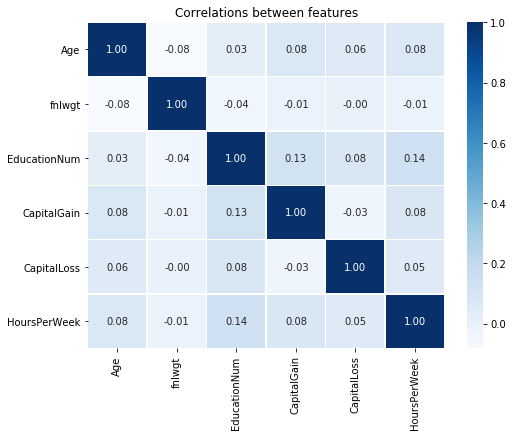

In [520]:
#Finding the correlation between features

f,ax=plt.subplots(figsize=(8,6))
sns.heatmap(train_dataset.corr(),annot=True,linewidth=.5,fmt=".2f",ax=ax,cmap="Blues")
plt.title("Correlations between features")
plt.show()

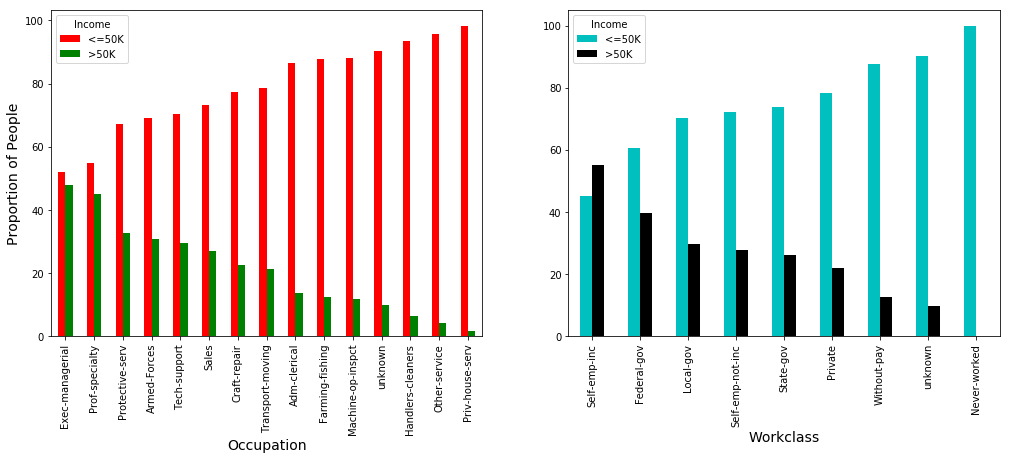

In [521]:
table_occu = pd.crosstab(train_dataset['Occupation'], train_dataset['Income'])
table_workclass = pd.crosstab(train_dataset['WorkClass'], train_dataset['Income'])
table_edu = pd.crosstab(train_dataset['Education'], train_dataset['Income'])
table_marital = pd.crosstab(train_dataset['MaritalStatus'], train_dataset['Income'])
table_gender = pd.crosstab(train_dataset['Gender'], train_dataset['Income'])
table_natcountry = pd.crosstab(train_dataset['NativeCountry'], train_dataset['Income'])
table_country = pd.crosstab(train_dataset['Country'], train_dataset['Income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(table_occu.div(table_occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax, color = {'g', 'r'});
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_workclass.div(table_workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax, color = 'C0, C2');
plt.xlabel("Workclass",fontsize = 14);

People who belongs to Exec-managerial category and prof-specialty earns more than 50K per year in compare to people belonging to other categories.

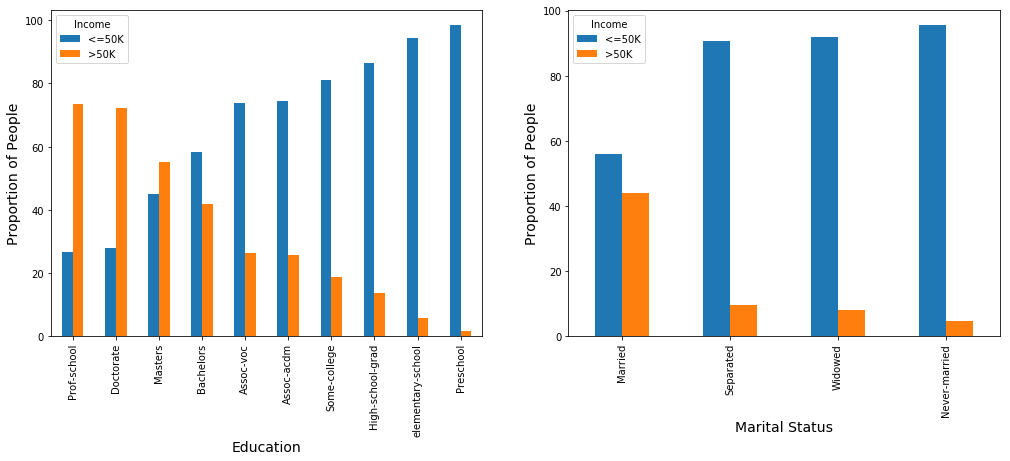

In [522]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_edu.div(table_edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(table_marital.div(table_marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax);
plt.xlabel('Marital Status',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

* People who have Doctorate, master’s degree and attended a prof school earns more than 50K per year, whereas people who only attended pre-school earns less than 50K per year.


* People who are Married appears to be earning more than 50k per year.

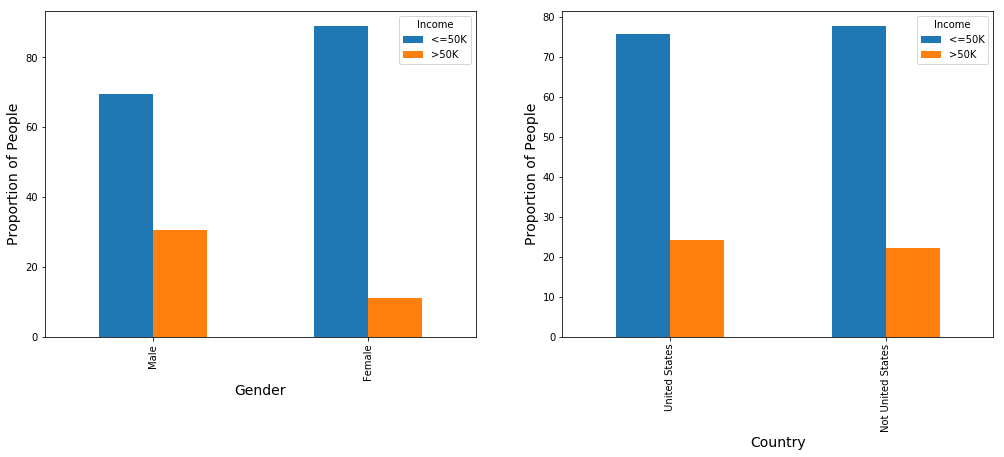

In [523]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(table_gender.div(table_gender.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Gender',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(table_country.div(table_country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

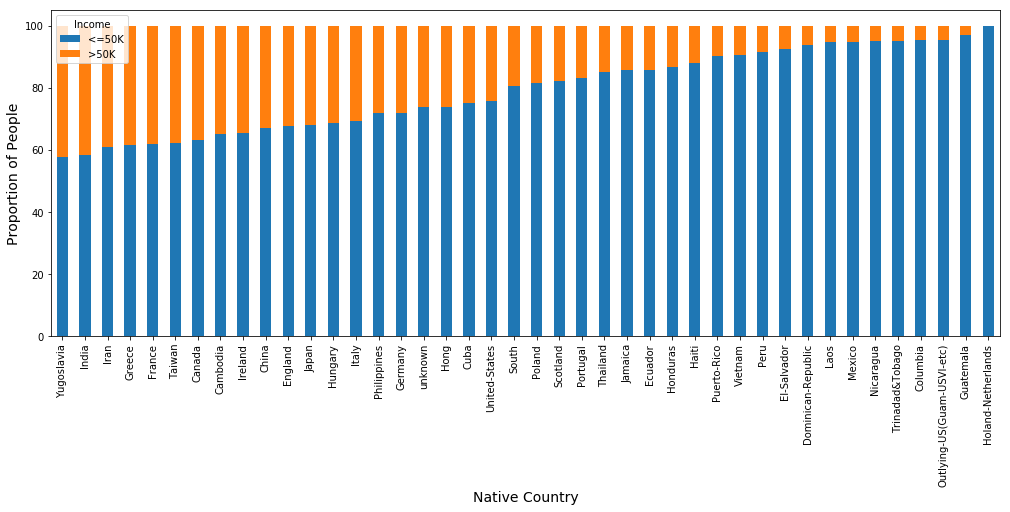

In [524]:
table_natcountry = pd.crosstab(train_dataset['NativeCountry'], dataset['Income'])
(table_natcountry.div(table_natcountry.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',stacked = True,figsize = (17,6));
plt.xlabel('Native Country',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

The top 5 countries which represents people earning more than 50k per year were Yugoslavia, India, Iran, Greece and France.

##### Exporting the transformed data

In [766]:
train_dataset.to_csv("/Users/Hemanshu/Documents/train_dataset.csv", sep = ',')
test_dataset.to_csv("/Users/Hemanshu/Documents/test_dataset.csv", sep = ',')

### 3. Data preparation

Now we will take care of the missing values in our dataset and check for any outliers

In [3]:
train_dataset = pd.read_csv('train_dataset.csv')
test_dataset = pd.read_csv('test_dataset.csv')

In [4]:
#Dropping the Unnamed column which represents index values
train_dataset.drop(labels = 'Unnamed: 0' ,axis = 1,inplace = True)
test_dataset.drop(labels = 'Unnamed: 0' ,axis = 1,inplace = True)

In [5]:
train_dataset.head()

,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Native_Region
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,Male,2174.0,0.0,40.0,United-States,<=50K,United_States
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married,NaN,Husband,Male,0.0,0.0,13.0,United-States,<=50K,United_States
2,38.0,Private,215646.0,High-school-grad,9.0,Separated,Handlers-cleaners,Not-in-family,Male,0.0,0.0,40.0,United-States,<=50K,United_States
3,53.0,Private,NaN,NaN,7.0,Married,Handlers-cleaners,Husband,Male,0.0,NaN,40.0,United-States,<=50K,United_States
4,28.0,Private,338409.0,Bachelors,13.0,Married,Prof-specialty,Wife,NaN,0.0,0.0,40.0,Cuba,<=50K,Central_America


In [6]:
train_dataset.replace({'0':np.nan, 0:np.nan}, inplace=True)

##### 1. Age

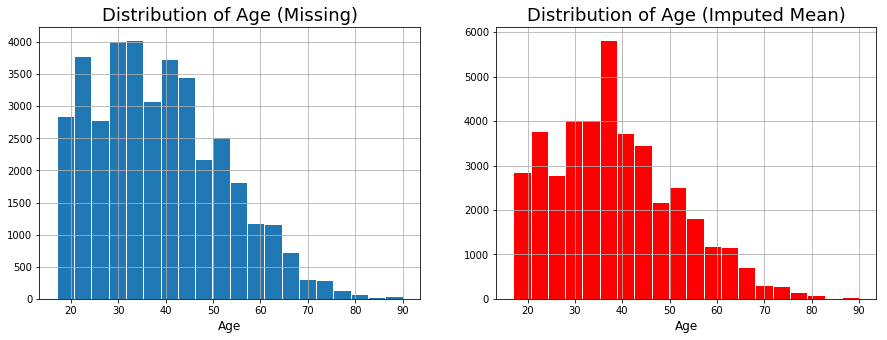

In [7]:
# Plot Distribution of Age (Missing)
plt.subplot(1, 2, 1)
train_dataset['Age'].hist(bins=20, figsize=(15,5), edgecolor='white')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Missing)', fontsize=18)

# Plot Distribution of Age (Imputed Mode)
plt.subplot(1, 2, 2)
mean_age = pd.DataFrame(train_dataset['Age'].fillna(train_dataset.Age.mean()))
mean_age['Age'].hist(bins=20, figsize=(15,5), edgecolor='white', color='r')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Imputed Mean)', fontsize=18)

plt.show()

In [8]:
# Fill in the missing age with the mean 
train_dataset['Age'] = pd.DataFrame(train_dataset['Age'].fillna(train_dataset.Age.mean()))
test_dataset['Age'] = pd.DataFrame(test_dataset['Age'].fillna(test_dataset.Age.mean()))

##### 2. HoursPerWeek

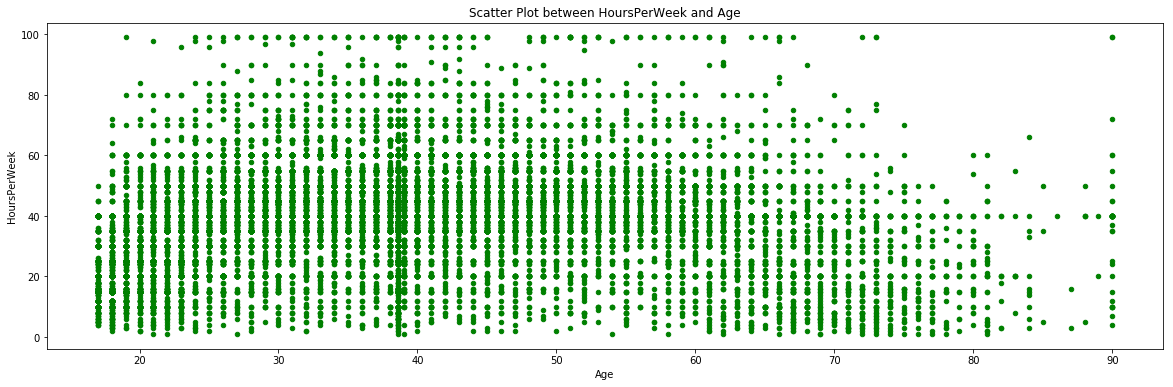

In [9]:
# Creating a scatter plot between HoursPerWeek and Age

plt.rcParams['axes.facecolor'] = 'w'
train_dataset.plot(kind="scatter",x="Age",y="HoursPerWeek",color="green",figsize=(20,6))
plt.title("Scatter Plot between HoursPerWeek and Age")
plt.xlabel("Age")
plt.ylabel("HoursPerWeek")
plt.show()

From the above scatter plot we can see that there are elder people with age >=90 working for more than 90 hours, which seems unrelistic and hence we can consider them as outlier and can remove from our dataset.

##### Removing outliers

In [10]:
work_age = train_dataset.loc[(train_dataset['HoursPerWeek']>=90) & (train_dataset['Age'] >= 90)] 
print("Number of people with age >= 90 working more than 90 hours per week:", work_age.shape[0])
work_age
#There was no outlier in test set

Number of people with age >= 90 working more than 90 hours per week: 2


,Age,WorkClass,fnlwgt,Education,EducationNum,MaritalStatus,Occupation,Relationship,Gender,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Income,Native_Region
12353,90.0,Private,90523.0,NaN,9.0,NaN,Transport-moving,Unmarried,Male,NaN,NaN,99.0,United-States,<=50K,United_States
34644,90.0,Federal-gov,311184.0,Masters,14.0,Separated,Prof-specialty,Not-in-family,Male,NaN,NaN,99.0,United-States,<=50K,United_States


In [11]:
# dropping rows for Number of people with age >= 90 working more than 90 hours per week
print("Number of observation before removing (train):",train_dataset.shape)
work_age = train_dataset.loc[(train_dataset['HoursPerWeek']>=90) & (train_dataset['Age'] >= 90)].index
train_dataset.drop(labels = work_age,axis = 0,inplace =True)
print("Number of observation after removing (train):",train_dataset.shape)

Number of observation before removing (train): (40935, 15)
Number of observation after removing (train): (40933, 15)


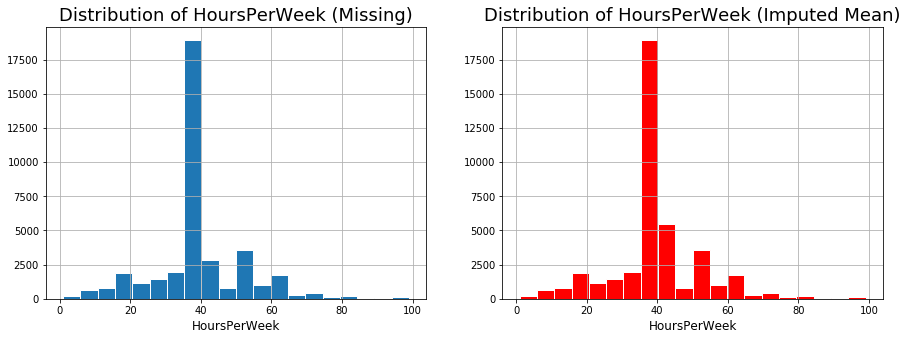

In [12]:
# Plot Distribution of HoursPerWeek (Missing)
plt.subplot(1, 2, 1)
train_dataset['HoursPerWeek'].hist(bins=20, figsize=(15,5), edgecolor='white')
plt.xlabel('HoursPerWeek', fontsize=12)
plt.title('Distribution of HoursPerWeek (Missing)', fontsize=18)

# Plot Distribution of HoursPerWeek (Imputed Mean)
plt.subplot(1, 2, 2)
mean_hr = pd.DataFrame(train_dataset['HoursPerWeek'].fillna(train_dataset.HoursPerWeek.mean()))
mean_hr['HoursPerWeek'].hist(bins=20, figsize=(15,5), edgecolor='white', color='r')
plt.xlabel('HoursPerWeek', fontsize=12)
plt.title('Distribution of HoursPerWeek (Imputed Mean)', fontsize=18)

plt.show()

##### Imputing missing values with mean

In [13]:
# Fill in the missing HoursPerWeek with the mean 
train_dataset['HoursPerWeek'] = pd.DataFrame(train_dataset['HoursPerWeek'].fillna(train_dataset.HoursPerWeek.mean()))
test_dataset['HoursPerWeek'] = pd.DataFrame(test_dataset['HoursPerWeek'].fillna(test_dataset.HoursPerWeek.mean()))

#### 3. Capital Gain

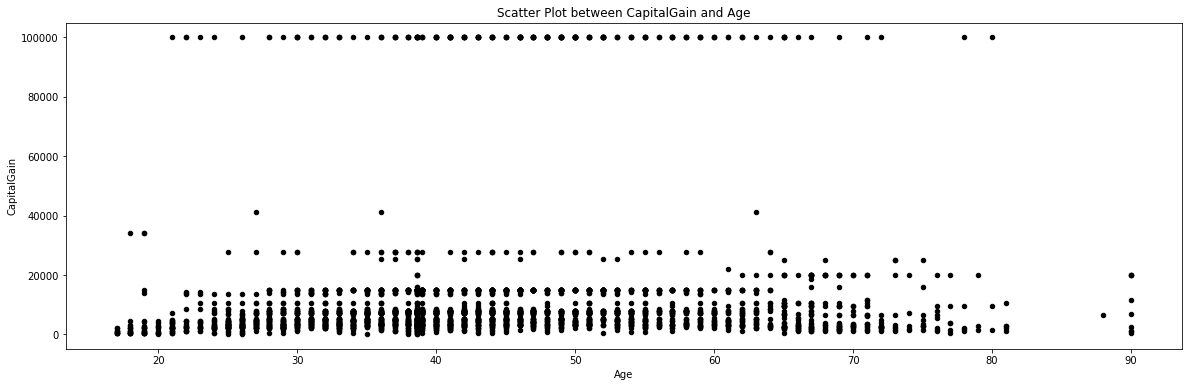

In [14]:
# Creating a scatter plot between CapitalGain and Age

plt.rcParams['axes.facecolor'] = 'w'
train_dataset.plot(kind="scatter",x="Age",y="CapitalGain",color="black",figsize=(20,6))
plt.title("Scatter Plot between CapitalGain and Age")
plt.xlabel("Age")
plt.ylabel("CapitalGain")
plt.show()

From the above scatter plot we can see that Capital gain of $9999 doesn't follow any pattern and is clearly an outlier. Hence, we can remove it from the dataset.

In [15]:
cap_age_tr = train_dataset.loc[(train_dataset['CapitalGain']>=9999)] 
print("Number of people with CapitalGain above $9999 (train):", cap_age_tr.shape[0])
cap_age_ts = test_dataset.loc[(test_dataset['CapitalGain']>=9999)] 
print("Number of people with CapitalGain above $9999 (test):", cap_age_ts.shape[0])

Number of people with CapitalGain above $9999 (train): 891
Number of people with CapitalGain above $9999 (test): 102


In [16]:
# dropping rows for Number of people with CapitalGain above $9999
print("Number of observation before removing (train):",train_dataset.shape)
cap_age_tr = train_dataset.loc[(train_dataset['CapitalGain']>=9999)].index
train_dataset.drop(labels = cap_age_tr,axis = 0,inplace =True)
print("Number of observation after removing (train):",train_dataset.shape)

print("Number of observation before removing (test):",test_dataset.shape)
cap_age_tr = test_dataset.loc[(test_dataset['CapitalGain']>=9999)].index
test_dataset.drop(labels = cap_age_tr,axis = 0,inplace =True)
print("Number of observation after removing (test):",test_dataset.shape)

Number of observation before removing (train): (40933, 15)
Number of observation after removing (train): (40042, 15)
Number of observation before removing (test): (4884, 14)
Number of observation after removing (test): (4782, 14)


##### Imputing missing values with mean

In [18]:
# Fill in the missing HoursPerWeek with the mean 
train_dataset['CapitalGain'] = pd.DataFrame(train_dataset['CapitalGain'].fillna(train_dataset.CapitalGain.mean()))
test_dataset['CapitalGain'] = pd.DataFrame(test_dataset['CapitalGain'].fillna(test_dataset.CapitalGain.mean()))

#### 4. CapitalLoss

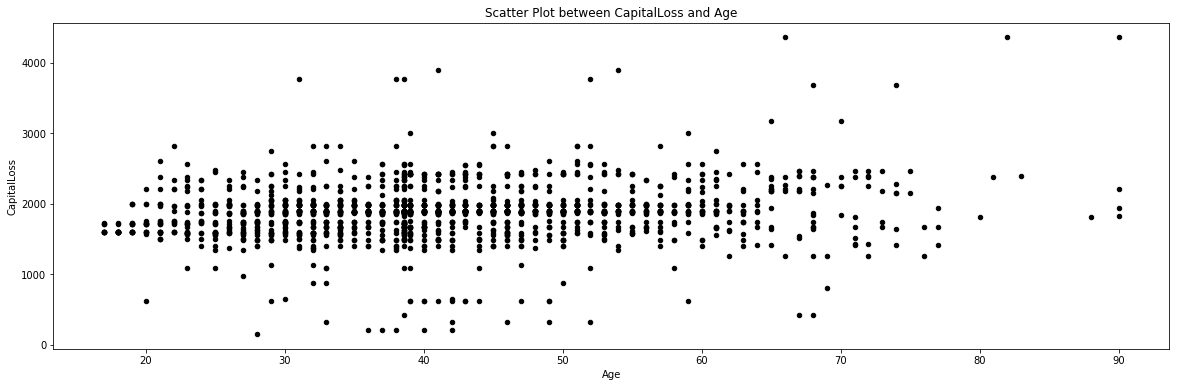

In [19]:
# Creating a scatter plot between CapitalGain and Age

plt.rcParams['axes.facecolor'] = 'w'
train_dataset.plot(kind="scatter",x="Age",y="CapitalLoss",color="black",figsize=(20,6))
plt.title("Scatter Plot between CapitalLoss and Age")
plt.xlabel("Age")
plt.ylabel("CapitalLoss")
plt.show()

CapitalLoss seems to have a good pattern and we can't see any outlier in this

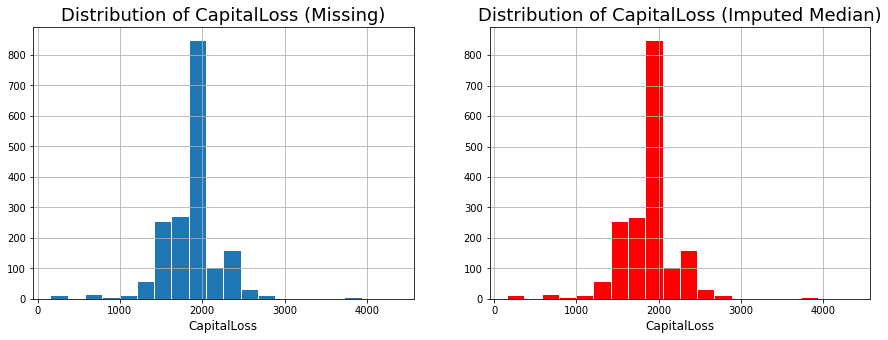

In [20]:
# Plot Distribution of CapitalLoss (Missing)
plt.subplot(1, 2, 1)
train_dataset['CapitalLoss'].hist(bins=20, figsize=(15,5), edgecolor='white')
plt.xlabel('CapitalLoss', fontsize=12)
plt.title('Distribution of CapitalLoss (Missing)', fontsize=18)

# Plot Distribution of CapitalLoss (Imputed Mean)
plt.subplot(1, 2, 2)
mean_cg = pd.DataFrame(train_dataset['CapitalLoss'].fillna(train_dataset.CapitalLoss.mode()))
mean_cg['CapitalLoss'].hist(bins=20, figsize=(15,5), edgecolor='white', color='r')
plt.xlabel('CapitalLoss', fontsize=12)
plt.title('Distribution of CapitalLoss (Imputed Median)', fontsize=18)

plt.show()

In [21]:
# Fill in the missing CapitalLoss with the mean 
train_dataset['CapitalLoss'] = pd.DataFrame(train_dataset['CapitalLoss'].fillna(train_dataset.CapitalLoss.mean()))
test_dataset['CapitalLoss'] = pd.DataFrame(test_dataset['CapitalLoss'].fillna(train_dataset.CapitalLoss.mean()))

#### Feature Removal

1. EducationNum and Education are giving similar information. Relationship and MaritalStatus imply similar information.Hence    keeping only one of the two.
2. Not enough information is provided for 'fnlwgt' hence removing it
3. Removing NativeCountry, since we have already created new feature name Native Region

In [22]:
del_cols = ['Relationship','EducationNum', 'fnlwgt', 'NativeCountry']
train_dataset.drop(labels = del_cols,axis = 1,inplace = True)
test_dataset.drop(labels = del_cols,axis = 1,inplace = True)

### 4. One Hot Encoding the categorical Features

In [23]:
train_dataset.head()

,Age,WorkClass,Education,MaritalStatus,Occupation,Gender,CapitalGain,CapitalLoss,HoursPerWeek,Income,Native_Region
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174.000000,1875.618625,40.0,<=50K,United_States
1,50.0,Self-emp-not-inc,Bachelors,Married,NaN,Male,4865.785268,1875.618625,13.0,<=50K,United_States
2,38.0,Private,High-school-grad,Separated,Handlers-cleaners,Male,4865.785268,1875.618625,40.0,<=50K,United_States
3,53.0,Private,NaN,Married,Handlers-cleaners,Male,4865.785268,1875.618625,40.0,<=50K,United_States
4,28.0,Private,Bachelors,Married,Prof-specialty,NaN,4865.785268,1875.618625,40.0,<=50K,Central_America


In [24]:
idx_train= ['Age','WorkClass','Education','MaritalStatus','Occupation','Gender','CapitalGain','CapitalLoss','HoursPerWeek','Native_Region','Income']
idx_test= ['Age','WorkClass','Education','MaritalStatus','Occupation','Gender','CapitalGain','CapitalLoss','HoursPerWeek','Native_Region']

In [25]:
train_dataset=train_dataset.reindex(columns=idx_train)
test_dataset=test_dataset.reindex(columns=idx_test)

In [31]:
train_dataset.head()

,Age,WorkClass,Education,MaritalStatus,Occupation,Gender,CapitalGain,CapitalLoss,HoursPerWeek,Native_Region,Income
0,39.0,State-gov,Bachelors,Never-married,Adm-clerical,Male,2174.000000,1875.618625,40.0,United_States,<=50K
1,50.0,Self-emp-not-inc,Bachelors,Married,NaN,Male,4865.785268,1875.618625,13.0,United_States,<=50K
2,38.0,Private,High-school-grad,Separated,Handlers-cleaners,Male,4865.785268,1875.618625,40.0,United_States,<=50K
3,53.0,Private,NaN,Married,Handlers-cleaners,Male,4865.785268,1875.618625,40.0,United_States,<=50K
4,28.0,Private,Bachelors,Married,Prof-specialty,NaN,4865.785268,1875.618625,40.0,Central_America,<=50K


In [26]:
new_num_col_tr = train_dataset[['Age','CapitalGain', 'CapitalLoss', 'HoursPerWeek']]
new_num_col_ts = test_dataset[['Age','CapitalGain', 'CapitalLoss', 'HoursPerWeek']]
new_num_col_tr.head()

,Age,CapitalGain,CapitalLoss,HoursPerWeek
0,39.0,2174.000000,1875.618625,40.0
1,50.0,4865.785268,1875.618625,13.0
2,38.0,4865.785268,1875.618625,40.0
3,53.0,4865.785268,1875.618625,40.0
4,28.0,4865.785268,1875.618625,40.0


We will we using OneHotEncoder for all our categorical features in order to convert them into dummy varibales

In [27]:
new_cat_col = ['WorkClass', 'Education', 'MaritalStatus', 'Occupation','Gender', 'Native_Region']

dummy_cat_train = pd.get_dummies(train_dataset[new_cat_col])
dummy_cat_test= pd.get_dummies(test_dataset[new_cat_col])
dummy_cat_train.head()

,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,WorkClass_State-gov,WorkClass_Without-pay,Education_Assoc-acdm,Education_Assoc-voc,...,Occupation_Transport-moving,Gender_Female,Gender_Male,Native_Region_Central_America,Native_Region_Central_Asia,Native_Region_East_Asia,Native_Region_Europe_East,Native_Region_Europe_West,Native_Region_South_America,Native_Region_United_States
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


Merging the converted categorical with Numerical variable

In [28]:
new_dataset_train = pd.concat([new_num_col_tr, dummy_cat_train], axis=1)
new_dataset_test = pd.concat([new_num_col_ts, dummy_cat_test], axis=1)
new_dataset_train.head()

,Age,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Never-worked,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,...,Occupation_Transport-moving,Gender_Female,Gender_Male,Native_Region_Central_America,Native_Region_Central_Asia,Native_Region_East_Asia,Native_Region_Europe_East,Native_Region_Europe_West,Native_Region_South_America,Native_Region_United_States
0,39.0,2174.000000,1875.618625,40.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,50.0,4865.785268,1875.618625,13.0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,38.0,4865.785268,1875.618625,40.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,53.0,4865.785268,1875.618625,40.0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,28.0,4865.785268,1875.618625,40.0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [29]:
del_fet = ['WorkClass_Never-worked', 'WorkClass_Without-pay', 'Occupation_Armed-Forces']
new_dataset_train.drop(labels = del_fet,axis = 1,inplace = True)

In [30]:
### Re-Formating the target variable to 0 and 1 (Binary output)

new_dataset_train['Income']=train_dataset['Income'].map({'<=50K': 0, '>50K': 1})

In [31]:
new_dataset_train.head()

,Age,CapitalGain,CapitalLoss,HoursPerWeek,WorkClass_Federal-gov,WorkClass_Local-gov,WorkClass_Private,WorkClass_Self-emp-inc,WorkClass_Self-emp-not-inc,WorkClass_State-gov,...,Gender_Female,Gender_Male,Native_Region_Central_America,Native_Region_Central_Asia,Native_Region_East_Asia,Native_Region_Europe_East,Native_Region_Europe_West,Native_Region_South_America,Native_Region_United_States,Income
0,39.0,2174.000000,1875.618625,40.0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,50.0,4865.785268,1875.618625,13.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,38.0,4865.785268,1875.618625,40.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,53.0,4865.785268,1875.618625,40.0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,28.0,4865.785268,1875.618625,40.0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [32]:
x = new_dataset_train.iloc[:,:-1].values
y = new_dataset_train.iloc[:,46].values

### 4. Modeling

In [144]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

#### 1. Logistic Regression (Baseline Model)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

In [47]:
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x, y, test_size = .2, random_state=12)

In [37]:
# Fit logistic regression model
logistic_model = LogisticRegression()
logistic_model = logistic_model.fit(x_train_res, y_train_res)

In [48]:
acc = logistic_model.score(x_train_res, y_train_res)
print('Accuracy:', acc)

Accuracy: 0.8365747822557987


In [166]:
pred = logistic_model.predict(x_val_res)

##### Confusion Matrix

In [167]:
import sklearn
cm = pd.DataFrame(sklearn.metrics.confusion_matrix(y_val_res,pred))
print(cm)

      0     1
0  4804  1417
1   333  1455


Apart from accuracy we want to know how well the model can specifically classify Income. In statistics, this is called recall, and it’s the number of correctly predicted “positives” divided by the total number of “positives”.

Here we are predicting Income with 81.3% accuracy

In [168]:
print('Recall:',recall_score(y_val_res, pred))
print('Precision:', precision_score(y_val_res, pred))

Recall: 0.8137583892617449
Precision: 0.5066155988857939


#### K-Fold Cross Validation

Cross-validation is a procedure used to avoid overfitting and estimate the skill of the model on new data.
The value for k is chosen such that each train/test group of data samples is large enough to be statistically representative of the broader dataset.

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [1189]:
# accurace of the baseline model using 5-cross validation method -
score = cross_val_score(logistic_model, x, y, cv = 5)
score

array([0.83268823, 0.82519665, 0.83603896, 0.83803696, 0.83878621])

In [1190]:
print ('5-Cross Validation accuracy', np.mean(score), np.std(score))

5-Cross Validation accuracy 0.8341494034745377 0.004949147901037578


#### 2.Random Forest

In [232]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [233]:
x_train_res, x_val_res, y_train_res, y_val_res = train_test_split(x, y, test_size = .2, random_state=12)

In [234]:
#fit a Random Forest model on training data - 
clf_rf = RandomForestClassifier(n_estimators=25, max_depth=50, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [235]:
print ('Validation Results')
print('Accuracy:',clf_rf.score(x_val_res, y_val_res))
print('Recall:',recall_score(y_val_res, clf_rf.predict(x_val_res)))
print('Precision:',precision_score(y_val_res, clf_rf.predict(x_val_res)))

Validation Results
Accuracy: 0.8313147708827568
Recall: 0.5497762863534675
Precision: 0.6429038587311968


In [236]:
score = cross_val_score(clf_rf, x, y, cv = 5)
score

array([0.83231365, 0.8330628 , 0.83366633, 0.83404096, 0.83366633])

In [237]:
print ('5-Cross Validation accuracy', np.mean(score), np.std(score))

5-Cross Validation accuracy 0.8333500155731397 0.0006056512118660882


#### Result

Among Logistic Regression and Random Forest, Logistic Regression seems to performing well and giving better result

### Oversamplig using SMOTE

Since our data is highly imbalanced, lets use oversampling to see if there is any improvement in the model performance

#### 1. Logistic Regression (SMOTE)

In [239]:
from imblearn.over_sampling import SMOTE

In [240]:
x_train, x_val, y_train, y_val = train_test_split(x, y,test_size = .2,random_state=12)

In [172]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [173]:
# Fit logistic regression model
logistic_model_sm = LogisticRegression()
logistic_model_sm = logistic_model.fit(x_train_res, y_train_res)

In [242]:
pred = logistic_model_sm.predict(x_val)

In [243]:
acc = logistic_model_sm.score(x_train_res, y_train_res)
print('Accuracy:', acc)

Accuracy: 0.7894671120407081


In [244]:
print('Recall:',recall_score(y_val_res, pred))
print('Precision:', precision_score(y_val_res, pred))

Recall: 0.8137583892617449
Precision: 0.5066155988857939


In [175]:
score = cross_val_score(logistic_model_sm, x_train_res, y_train_res, cv = 5)
score

array([0.80062274, 0.81303998, 0.82117742, 0.81926864, 0.81635523])

In [176]:
print ('5-Cross Validation accuracy', np.mean(score), np.std(score))

5-Cross Validation accuracy 0.8140928019795035 0.00727530900313186


Logistic Regression Model accuray actually dropped from 83.6% to 81.3% after perforimg oversampling using SMOTE.

Lets see how random Forest behaves.

#### 2. Random Forest (SMOTE)

In [187]:
x_train, x_val, y_train, y_val = train_test_split(x, y,test_size = .2,random_state=12)

In [188]:
sm = SMOTE(random_state=12, ratio = 1.0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

In [189]:
clf_rf = RandomForestClassifier(n_estimators=25, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [190]:
print ('Validation Results')
print ('Accuracy:',clf_rf.score(x_val, y_val))
print ('Recall:',recall_score(y_val, clf_rf.predict(x_val)))
print('Precision:',precision_score(y_val, clf_rf.predict(x_val)))

Validation Results
Accuracy: 0.8223248845049319
Recall: 0.5525727069351231
Precision: 0.6132836747361887


In [126]:
import sklearn
cm_rf = pd.DataFrame(sklearn.metrics.confusion_matrix(y_val_res,pred))
print(cm_rf)

      0    1
0  5818  403
1   936  852


Random Forest model accuracy increased from 81.7% to 82.2% after oversampling

#### 5. Model Tuning

Before predicting the result let see if we can fine tune our model to increase accuracy and get better result

In [150]:
np.seterr(divide='ignore', invalid='ignore')
import warnings
warnings.filterwarnings("ignore")

#### Random Forest (SMOTE)

#### a. Tree Depth

1 depth
AUC Train:  0.9435023708108976
AUC Test:  0.7014020671126555
2 depth
AUC Train:  0.9441252109619866
AUC Test:  0.6673378795283492
3 depth
AUC Train:  0.9669693803745077
AUC Test:  0.7215324294884865
4 depth
AUC Train:  0.9662259905167564
AUC Test:  0.6917038683653225
5 depth
AUC Train:  0.9745439202764606
AUC Test:  0.7208004874159726
10 depth
AUC Train:  0.9793659085429558
AUC Test:  0.7092495307982956
20 depth
AUC Train:  0.9842280800450053
AUC Test:  0.7170761820304827
50 depth
AUC Train:  0.9864180663827051
AUC Test:  0.7220260397506174
100 depth
AUC Train:  0.9866390741782527
AUC Test:  0.723739088970137


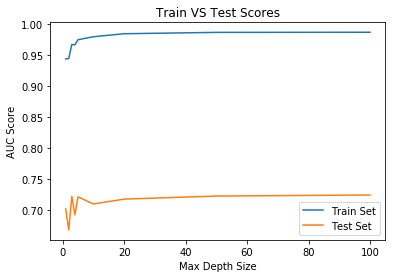

In [151]:
results1 = []
results2 = []
max_depth_size  = [1,2,3,4,5,10,20,50,100]

for depth in max_depth_size:
    clf_rf = RandomForestClassifier(depth, oob_score=True, n_jobs=-1, random_state=12)
    clf_rf.fit(x_train_res, y_train_res)
    print(depth, 'depth')
    pred1 = clf_rf .predict(x_train_res)
    pred2 = clf_rf .predict(x_val)
    roc1 = roc_auc_score(y_train_res, pred1)
    roc2 = roc_auc_score(y_val, pred2)
    print('AUC Train: ', roc1)
    print('AUC Test: ', roc2)
    results1.append(roc1)
    results2.append(roc2)

plt.plot(max_depth_size, results1, label='Train Set')
plt.plot(max_depth_size, results2, label='Test Set')
plt.xlabel('Max Depth Size')
plt.ylabel('AUC Score')
plt.title('Train VS Test Scores')
plt.legend(loc="lower right")
plt.show()

Tree with depth 50 gives best value for AUC Score, after depth of 50 there seems to be no significant change in score

#### b. Number of trees

1 trees
Accuracy:  0.788113372455987
2 trees
Accuracy:  0.8125858409289549
3 trees
Accuracy:  0.8113372455987015
4 trees
Accuracy:  0.8153327506555126
5 trees
Accuracy:  0.8160819078536646
15 trees
Accuracy:  0.8203271319765264
20 trees
Accuracy:  0.8202022724435011
25 trees
Accuracy:  0.8223248845049319
40 trees
Accuracy:  0.8217005868398052
50 trees
Accuracy:  0.8217005868398052
70 trees
Accuracy:  0.8202022724435011
100 trees
Accuracy:  0.8215757273067799


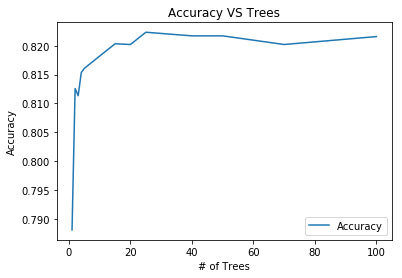

In [152]:
results = []
n_estimator_options = [1, 2, 3, 4, 5, 15, 20, 25, 40, 50, 70, 100]

for trees in n_estimator_options:
    clf_rf = RandomForestClassifier(trees, oob_score=True, random_state=12)
    clf_rf.fit(x_train_res, y_train_res)
    print(trees, 'trees')
    acc = clf_rf.score(x_val, y_val)
    print('Accuracy: ', acc)
    results.append(acc)
    
plt.plot(n_estimator_options, results, label='Accuracy')
plt.xlabel('# of Trees')
plt.ylabel('Accuracy')
plt.title('Accuracy VS Trees')
plt.legend(loc="lower right")
plt.show()

Highest accuracy is achieved when number of trees were 25.

#### Min Sample Leaf

1 min samples
Accuracy:  0.8223248845049319
2 min samples
Accuracy:  0.8313147708827568
3 min samples
Accuracy:  0.8359345736046947
4 min samples
Accuracy:  0.8321887876139343
5 min samples
Accuracy:  0.8338119615432639
6 min samples
Accuracy:  0.8311899113497315
7 min samples
Accuracy:  0.8315644899488076
8 min samples
Accuracy:  0.8310650518167062
9 min samples
Accuracy:  0.8278187039580472
10 min samples
Accuracy:  0.8290672992883007
20 min samples
Accuracy:  0.8238231989012361


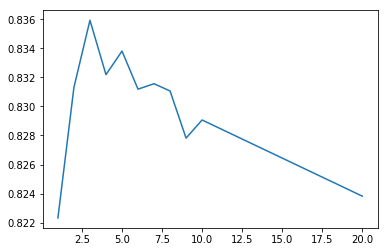

In [154]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,20]

for min_samples in min_samples_leaf_options:
    clf_rf = RandomForestClassifier(n_estimators=25, oob_score=True, n_jobs=-1, random_state=12, 
                                    max_features="auto", min_samples_leaf=min_samples)
    clf_rf.fit(x_train_res, y_train_res)
    print(min_samples, "min samples")
    acc = clf_rf.score(x_val, y_val)
    print('Accuracy: ', acc)
    results.append(acc)
    
pd.Series(results, min_samples_leaf_options).plot()

Highest accuracy is achieved when value for min_sample_leaf is 3.

#### Conclusion

Our Final choice of model will be Random Forest with Oversampling (SMOTE)

### 5.Evaluation

#### Random Forest

Passing the parameters which we got after model tuning in Random Forest

In [193]:
clf_rf = RandomForestClassifier(max_depth=50, n_estimators=25,  min_samples_leaf =3, random_state=12)
clf_rf.fit(x_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [194]:
print ('Validation Results')
print ('Accuracy:',clf_rf.score(x_val, y_val))
print ('Recall:',recall_score(y_val, clf_rf.predict(x_val)))
print('Precision:',precision_score(y_val, clf_rf.predict(x_val)))

Validation Results
Accuracy: 0.8364340117367961
Recall: 0.6314317673378076
Precision: 0.6342696629213483


Accuracy of the model got increased along with significant increase in Precision and Recall

#### Feature Importance

Age                              0.108265
CapitalGain                      0.023733
CapitalLoss                      0.011138
HoursPerWeek                     0.058859
WorkClass_Federal-gov            0.003733
WorkClass_Local-gov              0.004366
WorkClass_Private                0.016173
WorkClass_Self-emp-inc           0.005172
WorkClass_Self-emp-not-inc       0.012271
WorkClass_State-gov              0.002357
Education_Assoc-acdm             0.003161
Education_Assoc-voc              0.003889
Education_Bachelors              0.036879
Education_Doctorate              0.004186
Education_High-school-grad       0.057091
Education_Masters                0.021450
Education_Preschool              0.000134
Education_Prof-school            0.003894
Education_Some-college           0.015880
Education_elementary-school      0.013466
MaritalStatus_Married            0.214484
MaritalStatus_Never-married      0.101468
MaritalStatus_Separated          0.022063
MaritalStatus_Widowed            0

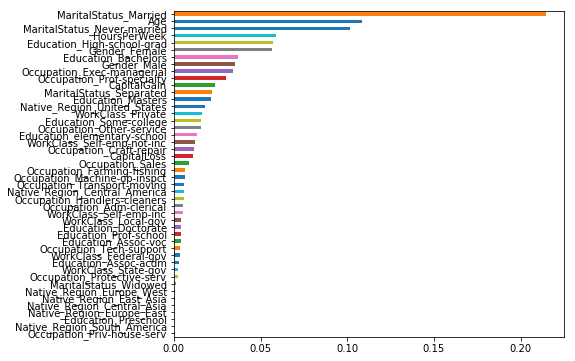

In [217]:
feature_importances = pd.Series(clf_rf.feature_importances_, index=new_dataset_train.columns[:-1])
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh', figsize=(7,6))

CapitalLoss      0.011138
CapitalGain      0.023733
Native_Region    0.026131
WorkClass        0.044072
HoursPerWeek     0.058859
Gender           0.091505
Age              0.108265
Occupation       0.136885
Education        0.160030
MaritalStatus    0.339382
dtype: float64


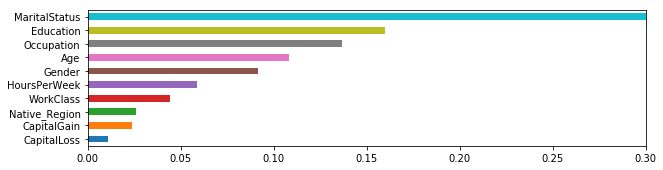

In [221]:
# Create function to combine feature importances
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.1, width=10, summarized_columns=None):  
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns:
        for col_name in summarized_columns:
            sum_value = sum(x for i, x in feature_dict.items() if col_name in i )
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            feature_dict[col_name] = sum_value
    results = pd.Series(feature_dict, index=feature_dict.keys())
    results.sort_values(inplace=True)
    print(results)
    results.plot(kind='barh', figsize=(width, len(results)/4), xlim=(0, .30))
 
# Create combined feature importances
graph_feature_importances(clf_rf, new_dataset_train.columns[:-1], summarized_columns=['WorkClass','Education','MaritalStatus',
                                                                                      'Occupation','Gender','Native_Region'])

Maritial Status seems to have higher significance followed by Education & Occupation

##### Predicintg the Income based on Tuned Random Forest model

In [222]:
pred = clf_rf.predict(new_dataset_test)

In [196]:
result_rf =pd.DataFrame(pred, columns=['Income']) 
result_rf.head()

,Income
0,0
1,0
2,0
3,0
4,0


In [198]:
result_rf['Income']=result_rf['Income'].map({0:'<=50K', 1:'>50K'})

In [199]:
result_rf.shape

(4782, 1)

In [200]:
result_rf.to_csv("/Users/Hemanshu/Documents/result_rf.csv", sep = ',')

#### Summary

1)	The average age of people is approx. 38 years with minimum being 17 years and maximum being 90 years.

2)	On average, people work for 40 hours per week

3)	Majority of the people had High school Education followed by some college degree.

4)	CapitalGain represents profit from the sale of property or an investment. The average CapitalGain of the population from dataset is around 1700.

5)	Based on feature importance we can see that MaritialStatus seems to have higher significance followed by Education & Occupation

6)	41.8% of the people had bachelor’s degree followed by High school education and Masters

7)	46.9% of the people have never married

8)	People who belongs to Exec-managerial category and prof-specialty earns more than 50K per year in compare to people belonging to other categories.

9)	People who have Doctorate, master’s degree and attended a prof school earns more than 50K per year, whereas people who only attended pre-school earns less than 50K per year.

10)	People who are Married appears to be earning more than 50k per year.

11)	The top 5 countries which represents people earning more than 50k per year were Yugoslavia, India, Iran, Greece and France.